# Programming Assignment 4 - Linear versus Ridge Regression 

Your friend Bob just moved to Boston. He is a real estate agent who is trying to evaluate the prices of houses in the Boston area. He has been using a linear regression model but he wonders if he can improve his accuracy on predicting the prices for new houses. He comes to you for help as he knows that you're an expert in machine learning. 

As a pro, you suggest doing a *polynomial transformation*  to create a more flexible model, and performing ridge regression since having so many features compared to data points increases the variance. 

Bob, however, being a skeptic isn't convinced. He wants you to write a program that illustrates the difference in training and test costs for both linear and ridge regression on the same dataset. Being a good friend, you oblige and hence this assignment :) 

In this notebook, you are to explore the effects of ridge regression.  We will use a dataset that is part of the sklearn.dataset package.  Learn more at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

## Step 1:  Getting, understanding, and preprocessing the dataset

We first import the standard libaries and some libraries that will help us scale the data and perform some "feature engineering" by transforming the data into $\Phi_2({\bf x})$

In [1]:
import numpy as np
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from sklearn.model_selection import KFold

###  Importing the dataset

In [2]:
# Import the boston dataset from sklearn
boston_data = load_boston()

In [3]:
#  Create X and Y variables - X holding the .data and Y holding .target 
X = boston_data.data
y = boston_data.target

#  Reshape Y to be a rank 2 matrix 
y = y.reshape(X.shape[0], 1)

# Observe the number of features and the number of labels
print('The number of features is: ', X.shape[1])
# Printing out the features
print('The features: ', boston_data.feature_names)
# The number of examples
print('The number of exampels in our dataset: ', X.shape[0])
#Observing the first 2 rows of the data
print(X[0:2])


The number of features is:  13
The features:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
The number of exampels in our dataset:  506
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]]


We will also create polynomial feeatures for the dataset to test linear and ridge regression on data with d = 1 and data with d = 2. Feel free to increase the # of degress and see what effect it has on the training and test error. 

In [4]:
# Create a PolynomialFeatures object with degree = 2. 
# Transform X and save it into X_2. Simply copy Y into Y_2 
poly = PolynomialFeatures(degree=2)
X_2 = poly.fit_transform(X)
y_2 = y

In [5]:
# the shape of X_2 and Y_2 - should be (506, 105) and (506, 1) respectively
print(X_2.shape)
print(y_2.shape)

(506, 105)
(506, 1)


# Your code goes here

In [6]:
# TODO - Define the get_coeff_ridge_normaleq function. Use the normal equation method.
# TODO - Return w values

def get_coeff_ridge_normaleq(X_train, y_train, alpha):
    # use np.linalg.pinv(a)
    #### TO-DO #####
    N = X_train.shape[1]
    # rint(N)
    I = np.identity(N)
    I[0][0] = 0.
    w = np.linalg.pinv(X_train.T.dot(X_train) + (alpha*N)*(I)).dot(X_train.T).dot(y_train)
    ##############
    return w

In [7]:
# TODO - Define the evaluate_err_ridge function.
# TODO - Return the train_error and test_error values

def evaluate_err(X_train, X_test, y_train, y_test, w): 
    #### TO-DO #####
    N_train = X_train.shape[0]
    temp1 = X_train.dot(w) - y_train
    train_error = 1 / N_train * (temp1.T.dot(temp1))
    
    N_test = X_test.shape[0]
    temp2 = X_test.dot(w) - y_test
    test_error = 1 / N_test * (temp2.T.dot(temp2))
    ##############
    return train_error[0][0], test_error[0][0]

In [8]:
# TODO - Finish writting the k_fold_cross_validation function. 
# TODO - Returns the average training error and average test error from the k-fold cross validation
# use Sklearns K-Folds cross-validator: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

def k_fold_cross_validation(k, X, y, alpha):
    kf = KFold(n_splits=k, random_state=21, shuffle=True)
    total_E_val_test = 0
    total_E_val_train = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # scaling the data matrix
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Adding a column of 1's to the front of X_train and X_test
        one_col = np.ones((X_train.shape[0],1))
        X_train = np.hstack((one_col, X_train ))
        one_col = np.ones((X_test.shape[0],1))
        X_test  = np.hstack((one_col, X_test ))
        
        # determine the training error and the test error
        #### TO-DO #####
        w = get_coeff_ridge_normaleq(X_train, y_train, alpha)
        train_error, test_error = evaluate_err(X_train, X_test, y_train, y_test, w)
        total_E_val_train += train_error
        total_E_val_test += test_error

    E_val_test = total_E_val_test / k
    E_val_train = total_E_val_train / k
       ##############
    return  E_val_test, E_val_train

In [9]:
import pandas as pd

In [10]:
# specify the value of k (k-fold cross validation)
k = 10

In [11]:
# linear transformation
d = 1
res_1 = [] # store the results from question 1-a to 1-

In [12]:
# 1-a fitting a linear model
alpha = 0.
E_val_test, E_val_train = k_fold_cross_validation(k, X, y, alpha)

print("MSE for test set: {}".format(E_val_test))
print("MSE for training set: {}".format(E_val_train))
res_1 += [[0., E_val_test, E_val_train, d]]

MSE for test set: 23.636068605428214
MSE for training set: 21.806183575851065


In [13]:
# 1-b ridge regression
Alpha = np.logspace(.01, 1, num=13)
res1 = []
for alpha in Alpha:
    E_val_test, E_val_train = k_fold_cross_validation(k, X, y, alpha)
    res1 += [[alpha, E_val_test, E_val_train]]
res1 = pd.DataFrame(res1, columns=['alpha', 'MSE_test','MSE_train'])
res1_temp = res1.sort_values(by=['MSE_test'])
print("The best alpha is {}, with test error: {}".format(res1_temp.iloc[0][0], res1_temp.iloc[0][1]))
res1

The best alpha is 1.023292992280754, with test error: 23.742384131659463


,alpha,MSE_test,MSE_train
0,1.023293,23.742384,21.959905
1,1.237371,23.784868,22.011321
2,1.496236,23.840126,22.077217
3,1.809256,23.910968,22.160725
4,2.187762,24.000650,22.265461
5,2.645453,24.112983,22.395608
6,3.198895,24.252498,22.556053
7,3.868121,24.424666,22.752576
8,4.677351,24.636176,22.992084
9,5.655878,24.895267,23.282905


In [14]:
# 1-c ridge regression: different alpha
Alpha = np.logspace(-2, 0.01, num=26)
res1 = []
for alpha in Alpha:
    E_val_test, E_val_train = k_fold_cross_validation(k, X, y, alpha)
    res1 += [[alpha, E_val_test, E_val_train]]
res1 = pd.DataFrame(res1, columns=['alpha', 'MSE_test','MSE_train'])
res1_temp = res1.sort_values(by=['MSE_test'])
res_1 += [list(res1_temp.iloc[0])+[d]]
print("The best alpha is {}, with test error: {}".format(res1_temp.iloc[0][0], res1_temp.iloc[0][1]))
res1

The best alpha is 0.1109685726774124, with test error: 23.633071871558464


,alpha,MSE_test,MSE_train
0,0.010000,23.635538,21.806210
1,0.012034,23.635437,21.806221
2,0.014481,23.635319,21.806238
3,0.017426,23.635180,21.806262
4,0.020970,23.635020,21.806297
5,0.025235,23.634836,21.806347
6,0.030367,23.634627,21.806420
7,0.036543,23.634394,21.806524
8,0.043974,23.634141,21.806674
9,0.052918,23.633872,21.806890


In [15]:
# get the best alpha when degree d = 1
# print(res_1)
res_1.sort(key=lambda x: x[1])
res_1

[[0.1109685726774124, 23.633071871558464, 21.80916627757687, 1],
 [0.0, 23.636068605428214, 21.806183575851065, 1]]

In [16]:
# 2 using a polynomial transformation with d = 2
res_2 = [] # store the results from question 2-a to 2-c
d = 2

In [17]:
# 2-a fitting a linear model
alpha = 0.
E_val_test, E_val_train = k_fold_cross_validation(k, X_2, y_2, alpha)

print("MSE for test set: {}".format(E_val_test))
print("MSE for training set: {}".format(E_val_train))
res_2 += [[0., E_val_test, E_val_train, d]]

MSE for test set: 11.854968234785357
MSE for training set: 5.808820816012466


In [18]:
# 2-b ridge regression
Alpha = np.logspace(.01, 1, num=13)
res2 = []
for alpha in Alpha:
    E_val_test, E_val_train = k_fold_cross_validation(k, X_2, y_2, alpha)
    res2 += [[alpha, E_val_test, E_val_train]]
res2 = pd.DataFrame(res2, columns=['alpha', 'MSE_test','MSE_train'])
res2_temp = res2.sort_values(by=['MSE_test'])
print("The best alpha is {}, with test error: {}".format(res2_temp.iloc[0][0], res2_temp.iloc[0][1]))
res2

The best alpha is 1.023292992280754, with test error: 19.199566714047066


,alpha,MSE_test,MSE_train
0,1.023293,19.199567,16.467710
1,1.237371,19.707877,17.036871
2,1.496236,20.211352,17.602888
3,1.809256,20.713472,18.169097
4,2.187762,21.219075,18.740287
5,2.645453,21.734330,19.322644
6,3.198895,22.266890,19.923844
7,3.868121,22.826188,20.553290
8,4.677351,23.423803,21.222416
9,5.655878,24.073726,21.944942


In [19]:
# 2-c ridge regression: different alpha
Alpha = np.logspace(-4, 0.01, num=26)
res2 = []
for alpha in Alpha:
    E_val_test, E_val_train = k_fold_cross_validation(k, X_2, y_2, alpha)
    res2 += [[alpha, E_val_test, E_val_train]]
res2 = pd.DataFrame(res2, columns=['alpha', 'MSE_test','MSE_train'])
res2_temp = res2.sort_values(by=['MSE_test'])
res_2 += [list(res2_temp.iloc[0])+[d]]
print("The best alpha is {}, with test error: {}".format(res2_temp.iloc[0][0], res2_temp.iloc[0][1]))
res2

The best alpha is 0.0009170647491149314, with test error: 11.304755407906294


,alpha,MSE_test,MSE_train
0,0.000100,11.525991,5.871832
1,0.000145,11.479109,5.897656
2,0.000209,11.431263,5.933510
3,0.000303,11.385505,5.981932
4,0.000438,11.345973,6.045656
5,0.000634,11.317474,6.127428
6,0.000917,11.304755,6.229632
7,0.001327,11.311855,6.353890
8,0.001920,11.341654,6.500932
9,0.002777,11.395626,6.670971


In [20]:
# get the best alpha when degree d = 2
# print(res2)
res_2.sort(key=lambda x: x[1])
res_2

[[0.0009170647491149314, 11.304755407906294, 6.22963199327044, 2],
 [0.0, 11.854968234785357, 5.808820816012466, 2]]

In [21]:
# proganswer
import matplotlib.pyplot as plt

In [22]:
# 3-a alpha and MSE_test

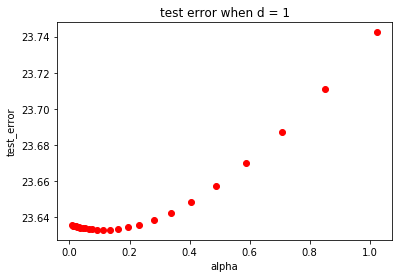

In [23]:
# d = 1
alpha_x = res1['alpha']
mse_test = res1['MSE_test']

plt.plot(alpha_x, mse_test, 'ro')

plt.title('test error when d = 1')
plt.xlabel('alpha')
plt.ylabel('test_error')
plt.show()

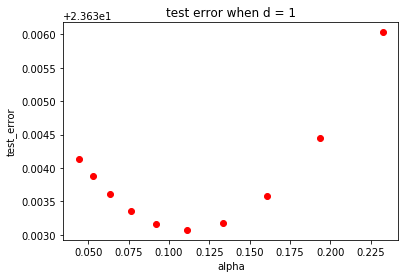

In [24]:
# d = 1
# show the minimum test error when d = 1
res1_1 = res1[8:18]
alpha_x = res1_1['alpha']
mse_test = res1_1['MSE_test']

plt.plot(alpha_x, mse_test, 'ro')

plt.title('test error when d = 1')
plt.xlabel('alpha')
plt.ylabel('test_error')
plt.show()

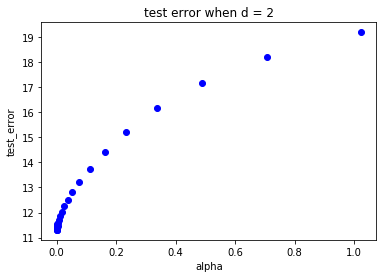

In [25]:
# d = 2
alpha_x = res2['alpha']
mse_test = res2['MSE_test']

plt.plot(alpha_x, mse_test, 'bo')

plt.title('test error when d = 2')
plt.xlabel('alpha')
plt.ylabel('test_error')
plt.show()

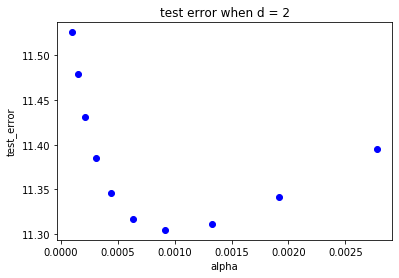

In [26]:
# d = 2
# show the minimum test error when d = 2
res2_1 = res2[:10]
alpha_x = res2_1['alpha']
mse_test = res2_1['MSE_test']

plt.plot(alpha_x, mse_test, 'bo')

plt.title('test error when d = 2')
plt.xlabel('alpha')
plt.ylabel('test_error')
plt.show()

In [27]:
# 3-b choose one model to fit
# print(res_1[0])
# print(res_2[0])
model_best = min(res_1[0], res_2[0], key=lambda x: x[1])
alpha_best = model_best[0]
d_best = model_best[-1]

X_single_test = np.array([5, 0.5, 2, 0, 4, 8, 4, 6, 2, 2, 2, 4, 5.5])
X_single_test = X_single_test.reshape(1, X_single_test.shape[0])
X_best = X
y_best = y

if d_best == 2:
    X_best = X_2
    X_single_test = poly.fit_transform(X_single_test)


scaler = preprocessing.StandardScaler().fit(X_best)
X_best = scaler.transform(X_best)
X_single_test = scaler.transform(X_single_test)

y_best_mean = np.mean(y_best)
y_best -= y_best_mean

w_best = get_coeff_ridge_normaleq(X_best, y_best, alpha_best)
y_single_test = X_single_test.dot(w_best)[0][0]
print("The predicted price is: {}".format(y_single_test))
# print(d_best)

The predicted price is: 202.12890536000813
